
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for creating plots
import pylab # used for supporting matplotlib plots
import pingouin as pg # used for statistical analysis

df_mh = pd.read_csv('D:\MillerHadenData.csv')
## Because of my computer settings, my path is different from others.


In [2]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()
print(df_mh.head())

# Check data types and information
df_mh.info()

#Q1a: The data is of the interval type because it contains consecutive numbers, and the difference between the numbers is meaningful.

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [3]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull()
print(missing_values)
# Check whether there is a data point for each participant on both variables:
if True in df_mh.isnull()['Abil']:
    print('Missing data in Ability')
elif True in df_mh.isnull()['IQ']:
    print('Missing data in IQ')
else:
    print('There is a data point for each participant on both variables')
# Q1b:Judging from the results, there are data points between the two variables Reading Ability and IQ, and there are no null values.

    Participant   Abil     IQ   Home     TV
0         False  False  False  False  False
1         False  False  False  False  False
2         False  False  False  False  False
3         False  False  False  False  False
4         False  False  False  False  False
5         False  False  False  False  False
6         False  False  False  False  False
7         False  False  False  False  False
8         False  False  False  False  False
9         False  False  False  False  False
10        False  False  False  False  False
11        False  False  False  False  False
12        False  False  False  False  False
13        False  False  False  False  False
14        False  False  False  False  False
15        False  False  False  False  False
16        False  False  False  False  False
17        False  False  False  False  False
18        False  False  False  False  False
19        False  False  False  False  False
20        False  False  False  False  False
21        False  False  False  F

In [4]:
# Q1c (code):
# Check data distribution
import scipy.stats as stats
score_Abli, p_val_Abli = stats.shapiro(df_mh['Abil'])
print(score_Abli, p_val_Abli)
score_IQ, p_val_IQ = stats.shapiro(df_mh['IQ'])
print(score_IQ, p_val_IQ)
#Q1c: For the variable "Abil", the statistical score is 0.949 and the p-value is 0.235. 
# The p-value is greater than the significance level of 0.05, 
# so the null hypothesis cannot be rejected and the data can be considered to be normally distributed.
# For the variable "IQ", the statistical score is 0.964, the p-value is 0.491, 
# the p-value is greater than the significance level 0.05, 
# so the null hypothesis cannot be rejected and the data can be considered to be normally distributed.
# In conclusion, both variables can be considered to be normally distributed.

0.9487951397895813 0.2354906052350998
0.9636039137840271 0.49081143736839294


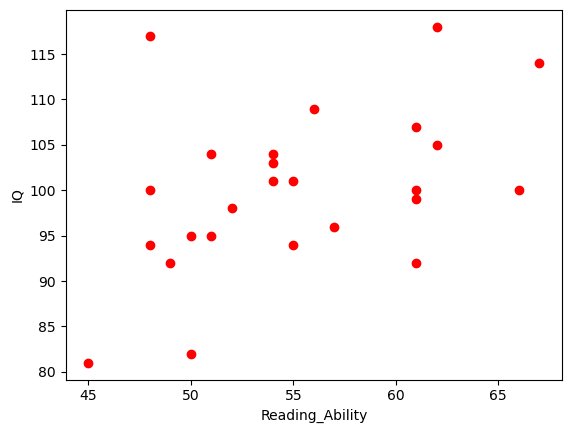

In [5]:
# Q1d (code):
# Scatter plot
Reading_Ability = df_mh['Abil']
IQ = df_mh['IQ']

plt.scatter(Reading_Ability, IQ, c="r")
plt.xlabel("Reading_Ability") 
plt.ylabel("IQ") 
plt.show()



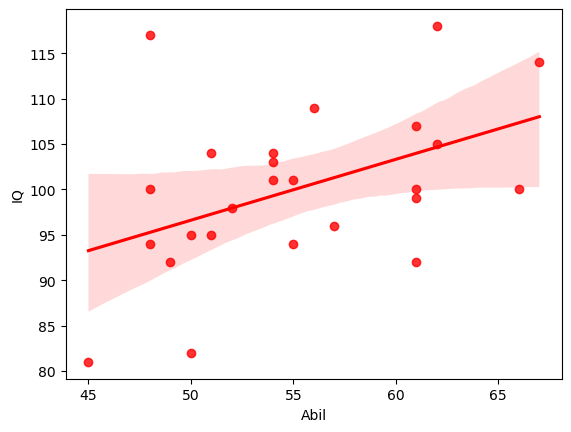

In [6]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh)

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [7]:
# Q2a (answer with words):
# According to the correlation line in question 1, we can see that it is monotonic and linear.
# So, Parametric (Pearson) and non-parametric(Spearman) correlation methods can be used.

In [8]:
# Q2b (code):
corr_abil_IQ = pg.corr(Reading_Ability, IQ)
print(corr_abil_IQ)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [9]:
# Q2c (answer with words):
# According to the results provided, the correlation coefficient between the two variables is 0.45117, 
# which indicates that there is a moderate positive relationship between them. 
# In other words, as one variable increases, the other variable also tends to increase, and vice versa.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [10]:
# Q3a (answer in words):
# H0: There is no relationship between reading ability and the amount of time spent reading at home per week.
# H1：There is an relationship between reading ability and the amount of time spent reading at home per week.

In [11]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data manipulation and analysis
from scipy.stats import chi2_contingency ##used for conducting chi-square tests

# Define the rounded average for Reading Ability and Home
avg_reading_ability = round(df_mh['Abil'].mean())
avg_home = round(df_mh['Home'].mean())
# Create the Rank_Abil column
df_mh['Rank_Abil'] = 'Low'
df_mh.loc[df_mh['Abil'] > avg_reading_ability, 'Rank_Abil'] = 'High'

# Create the Rank_Home column
df_mh['Rank_Home'] = 'Infrequent'
df_mh.loc[df_mh['Home'] > avg_home, 'Rank_Home'] = 'Frequent'
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [12]:
# Q3c (code):
# Construct Contingency Matrix
import numpy as np
datacontingency = []
high = df_mh[df_mh['Rank_Abil'] == 'High']
high_frequent = high[high['Rank_Home'] == 'Frequent']
high_infrequent = high[high['Rank_Home'] == 'Infrequent']

low = df_mh[df_mh['Rank_Abil'] == 'Low']
low_frequent = low[low['Rank_Home'] == 'Frequent']
low_infrequent = low[low['Rank_Home'] == 'Infrequent']

datacontingency.append(len(high_frequent))
datacontingency.append(len(low_frequent))
datacontingency.append(len(high_infrequent))
datacontingency.append(len(low_infrequent))

print('The values:')
print(datacontingency)

data_cm = np.array(datacontingency).reshape(2, -1)

print('The contingency matrix')
print(data_cm)

The values:
[8, 3, 2, 12]
The contingency matrix
[[ 8  3]
 [ 2 12]]


In [13]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 6.6]
 [5.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


In [14]:
# Q3e (answer in words):
# Based on the results of the Chi-square test:The Chi-square statistic is 6.50, and the associated p-value is approximately 0.01.
# For the group of low reading ability and infrequent reading, the expected frequency is 4.4.
# For the group of low reading ability and frequent reading, the expected frequency is 5.6.
# For the group of high reading ability and infrequent reading, the expected frequency is 6.6.
# For the group of high reading ability and frequent reading, the expected frequency is 8.4.
# Since the p-value (0.01) is less than the significance level 0.05, we reject H0. 
# This shows that there is a significant association between reading ability and weekly reading time at home. 
# In other words, individuals with different reading abilities tend to spend different amounts of time reading at home.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [15]:

import pandas as pd # used for data analysis
from scipy import stats # used for statistical analysis and mathematical computations
import numpy as np # used for numerical computations
import matplotlib.pyplot as plt ## used for plotting
import seaborn as sns # used for data visualization

# Load the data
df_evaluators = pd.read_csv('D:\evaluators.csv')
df_evaluators.head()
## Because of my computer settings, my path is different from others.

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [16]:
# Q4a (code):
# Calculate mean and standard deviation for age
result = df_evaluators['age'].agg(['mean', 'std'])
print(result)
# So the mean and standard deviation for age is 30.852941 and 6.238358

mean    30.852941
std      6.238358
Name: age, dtype: float64


In [17]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male = df_evaluators.loc[df_evaluators['sex'] == 1, 'sex'].count()
female = df_evaluators.loc[df_evaluators['sex'] == 2, 'sex'].count()
print("Male evaluators:", male)
print("Female evaluators:", female)
# So the male evaluators are 4, female evaluators are 30.

Male evaluators: 4
Female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [18]:
# Load ratings data
df_ratings = pd.read_csv('D:\\ratings.csv')
df_ratings.head()
## Because of my computer settings, my path is different from others.

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [19]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
categories = ['thoughtful', 'competent', 'intelligent']
new_df = df_ratings[df_ratings['Category'].isin(categories)]
## Source from:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = new_df.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])
ratings2.reset_index(drop=True, inplace=True) # Reset the index to remove the old index

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [20]:
# Q6a (answer in words):
# Null hypothesis: There is no significant difference between overall ratings on the {impression} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2).

# Alternative hypothesis: There is a significant difference between overall ratings on the {impression} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {impression} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {impression} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [21]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# Answer: We should choose two-tail, because the alternative hypothesis is non-directional.

In [22]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# Answer: the independent variable is the resume pitches adopted by the evaluators (conditions), either listening or reading.
# And the dependent variable is the overall ratings on the {intellect/hire/impression} scale given by the evaluators for the candidates.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [23]:
##Q7a (code): This one is for intellect ratings.
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analysis

# Descriptive analysis of the ratings
intellect_ratings = ratings2[ratings2['Category'] == 'intellect']['Rating']
ratings_desc = intellect_ratings.describe()

# Test for normal distribution (Shapiro-Wilk test)
listen_intellect_ratings = ratings2.loc[ratings2['condition'] == 'listened'].loc[ratings2['Category'] == 'intellect', 'Rating']
read_intellect_ratings = ratings2.loc[ratings2['condition'] == 'read'].loc[ratings2['Category'] == 'intellect', 'Rating']

shapiro_results = {}
shapiro_results['listen'] = stats.shapiro(listen_intellect_ratings)
shapiro_results['read'] = stats.shapiro(read_intellect_ratings)

for condition, (score, p_val) in shapiro_results.items():
    if p_val > 0.05:
        print("The data follows a normal distribution.")
    else:
        print("The data does not follow a normal distribution.")

# Test for homogeneity of variances (Levene's test)
score, p_val = levene(read_intellect_ratings, listen_intellect_ratings)
levene_results = {'score': score, 'p_val': p_val}
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

# Independent t-tests
ttest_score, p_val = stats.ttest_ind(read_intellect_ratings, listen_intellect_ratings)
ttest_results = {'ttest_score': ttest_score, 'p_val': p_val}
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

ratings_desc, shapiro_results, levene_results, ttest_results

The data follows a normal distribution.
The data follows a normal distribution.
Levene's test is not significant - proceed
Difference is statistically significant - reject H0, confirm H1


(count    39.000000
 mean      4.717949
 std       2.000787
 min       0.666667
 25%       3.500000
 50%       5.000000
 75%       6.000000
 max       9.000000
 Name: Rating, dtype: float64,
 {'listen': ShapiroResult(statistic=0.9350408315658569, pvalue=0.17365092039108276),
  'read': ShapiroResult(statistic=0.9512398838996887, pvalue=0.4447984993457794)},
 {'score': 0.8980185752566812, 'p_val': 0.34946205893248505},
 {'ttest_score': -3.5259329220482414, 'p_val': 0.0011444414996286821})

In [24]:
##Q7a (code): This one is for hire ratings.
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analysis

# Descriptive analysis of the ratings
hire_ratings = ratings2[ratings2['Category'] == 'hire']['Rating']
ratings_desc = hire_ratings.describe()

# Test for normal distribution (Shapiro-Wilk test)
listen_hire_ratings = ratings2.loc[ratings2['condition'] == 'listened'].loc[ratings2['Category'] == 'hire', 'Rating']
read_hire_ratings = ratings2.loc[ratings2['condition'] == 'read'].loc[ratings2['Category'] == 'hire', 'Rating']

shapiro_results = {}
shapiro_results['listen'] = stats.shapiro(listen_hire_ratings)
shapiro_results['read'] = stats.shapiro(read_hire_ratings)

for condition, (score, p_val) in shapiro_results.items():
    if p_val > 0.05:
        print("The data follows a normal distribution.")
    else:
        print("The data does not follow a normal distribution.")

# Test for homogeneity of variances (Levene's test)
score, p_val = levene(read_hire_ratings, listen_hire_ratings)
levene_results = {'score': score, 'p_val': p_val}
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

# Independent t-tests
ttest_score, p_val = stats.ttest_ind(read_hire_ratings, listen_hire_ratings)
ttest_results = {'ttest_score': ttest_score, 'p_val': p_val}
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

ratings_desc, shapiro_results, levene_results, ttest_results

The data follows a normal distribution.
The data follows a normal distribution.
Levene's test is not significant - proceed
Difference is statistically significant - reject H0, confirm H1


(count    39.000000
 mean      3.871795
 std       2.330343
 min       0.000000
 25%       2.000000
 50%       4.000000
 75%       5.000000
 max       8.000000
 Name: Rating, dtype: float64,
 {'listen': ShapiroResult(statistic=0.9390669465065002, pvalue=0.20883114635944366),
  'read': ShapiroResult(statistic=0.9034496545791626, pvalue=0.06600592285394669)},
 {'score': 0.10663746145199855, 'p_val': 0.7458453933447955},
 {'ttest_score': -2.620100218173143, 'p_val': 0.012674511839824125})

In [25]:
##Q7a (code): This one is for impression ratings.
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analysis

# Descriptive analysis of the ratings
impression_ratings = ratings2[ratings2['Category'] == 'impression']['Rating']
ratings_desc = impression_ratings.describe()

# Test for normal distribution (Shapiro-Wilk test)
listen_impression_ratings = ratings2.loc[ratings2['condition'] == 'listened'].loc[ratings2['Category'] == 'impression', 'Rating']
read_impression_ratings = ratings2.loc[ratings2['condition'] == 'read'].loc[ratings2['Category'] == 'impression', 'Rating']

shapiro_results = {}
shapiro_results['listen'] = stats.shapiro(listen_impression_ratings)
shapiro_results['read'] = stats.shapiro(read_impression_ratings)

for condition, (score, p_val) in shapiro_results.items():
    if p_val > 0.05:
        print("The data follows a normal distribution.")
    else:
        print("The data does not follow a normal distribution.")

# Test for homogeneity of variances (Levene's test)
score, p_val = levene(read_impression_ratings, listen_impression_ratings)
levene_results = {'score': score, 'p_val': p_val}
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

# Independent t-tests
ttest_score, p_val = stats.ttest_ind(read_impression_ratings, listen_impression_ratings)
ttest_results = {'ttest_score': ttest_score, 'p_val': p_val}
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

ratings_desc, shapiro_results, levene_results, ttest_results

The data follows a normal distribution.
The data follows a normal distribution.
Levene's test is not significant - proceed
Difference is statistically significant - reject H0, confirm H1


(count    39.000000
 mean      5.094017
 std       2.254234
 min       0.333333
 25%       3.666667
 50%       5.333333
 75%       7.000000
 max       8.666667
 Name: Rating, dtype: float64,
 {'listen': ShapiroResult(statistic=0.9394754767417908, pvalue=0.21275967359542847),
  'read': ShapiroResult(statistic=0.9483764171600342, pvalue=0.40011918544769287)},
 {'score': 0.39045326236607025, 'p_val': 0.5358960150374064},
 {'ttest_score': -2.850766179025179, 'p_val': 0.007091060616710596})

In [26]:
#Q7b (answer in words): 
# For intellect ratings:
# 1. Descriptive statistics provides basic statistical information for ratings, including mean, standard deviation, minimum value, 25% quantile, 
# median, 75% quantile, and maximum value.It helps us understand the distribution of intelligence scores.
# 2. The Shapiro-Wilk test was used to test whether the ratings conforms to a normal distribution. In this result, 
# we found that the intellect ratings of both groups passed the test (both p values ​​were greater than 0.05), 
# indicating that the data statistically conformed to the assumption of normal distribution.
# 3. Levene's test is used to test whether the variances of two sets of data are equal. In this result, the p-value of Levene's test is  about 0.35, 
# which is greater than 0.05, so we obtain that Levene's test is NOT significant, and the we can proceed with testing our hypothesis. 
# And then we can conduct a t-test.
# 4. T-test is used to compare whether there is a significant difference in the means of two sets of data, and can help us determine 
# whether listening and reading have an impact on intellect ratings.In this result, the p-value of the t-test is 0.0011, 
# which is less than 0.05, indicating that there is a significant difference in the means of the two groups of scores. 
# Therefore, we rejected the null hypothesis and accepted the alternative hypothesis.

# For hire ratings: 
# 1. Descriptive statistics provides basic statistical information for ratings, including mean, standard deviation, minimum value, 25% quantile, 
# median, 75% quantile, and maximum value.It helps us understand the distribution of hire scores.
# 2. The Shapiro-Wilk test was used to test whether the ratings conforms to a normal distribution. In this result, 
# we found that the hire ratings of both groups passed the test (both p values ​​were greater than 0.05), 
# indicating that the data statistically conformed to the assumption of normal distribution.
# 3. Levene's test is used to test whether the variances of two sets of data are equal. In this result, the p-value of Levene's test is  about 0.75, 
# which is greater than 0.05, so we obtain that Levene's test is NOT significant, and the we can proceed with testing our hypothesis. 
# And then we can conduct a t-test.
# 4. T-test is used to compare whether there is a significant difference in the means of two sets of data, and can help us determine 
# whether listening and reading have an impact on hire ratings.In this result, the p-value of the t-test is 0.012, 
# which is less than 0.05, indicating that there is a significant difference in the means of the two groups of scores. 
# Therefore, we rejected the null hypothesis and accepted the alternative hypothesis.

# For impression ratings:
# 1. Descriptive statistics provides basic statistical information for ratings, including mean, standard deviation, minimum value, 25% quantile, 
# median, 75% quantile, and maximum value.It helps us understand the distribution of impression scores.
# 2. The Shapiro-Wilk test was used to test whether the ratings conforms to a normal distribution. In this result, 
# we found that the impression ratings of both groups passed the test (both p values ​​were greater than 0.05), 
# indicating that the data statistically conformed to the assumption of normal distribution.
# 3. Levene's test is used to test whether the variances of two sets of data are equal. In this result, the p-value of Levene's test is about 0.535, 
# which is greater than 0.05, so we obtain that Levene's test is NOT significant, and the we can proceed with testing our hypothesis. 
# And then we can conduct a t-test.
# 4. T-test is used to compare whether there is a significant difference in the means of two sets of data, and can help us determine 
# whether listening and reading have an impact on impression ratings.In this result, the p-value of the t-test is 0.007, 
# which is less than 0.05, indicating that there is a significant difference in the means of the two groups of scores. 
# Therefore, we rejected the null hypothesis and accepted the alternative hypothesis.